# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
# YOUR CODE HERE

# first imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Linear_Regression.ipynb NBA.csv                 tests
Makefile                README.md


In [3]:
nba_df = pd.read_csv("NBA.csv")
nba_df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [4]:
# YOUR CODE HERE

# Define X
X = nba_df[["mp"]]
X.head() # DataFrame

,mp
0,2409
1,2708
2,2407
3,585
4,2056


In [5]:
# Define y 
y = nba_df["win_rating"]
y.head() # Series 

0     1.643091
1    10.808427
2     3.054773
3     0.230004
4     0.905614
Name: win_rating, dtype: float64

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

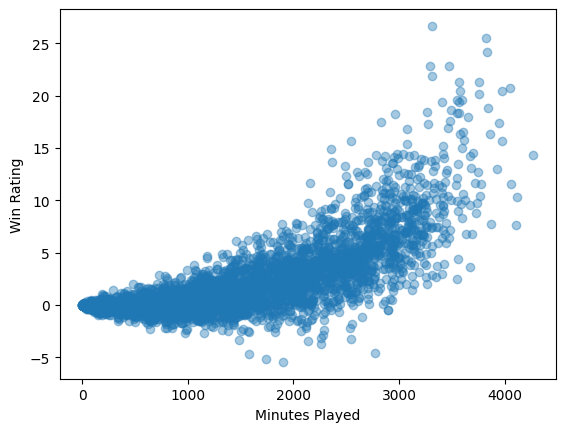

In [6]:
# YOUR CODE HERE
plt.scatter(X, y, alpha=0.4)
plt.xlabel("Minutes Played")
plt.ylabel("Win Rating");

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate 
from sklearn.linear_model import LinearRegression

# instaniate the model 
model = LinearRegression()

# 5 results of 5 hypothetical models 
cv_results = cross_validate(model, X, y, cv=5) 
cv_results

{'fit_time': array([0.00277591, 0.00394797, 0.0022738 , 0.00213504, 0.00364614]),
 'score_time': array([0.00235105, 0.00115013, 0.00322509, 0.00177312, 0.00135994]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [8]:
# YOUR CODE HERE
min_score = np.min(cv_results["test_score"])
min_score

0.5344790822272503

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [9]:
# YOUR CODE HERE
max_score = np.max(cv_results["test_score"])
max_score

0.5791776193355004

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [10]:
# YOUR CODE HERE
mean_score = np.mean(cv_results["test_score"])
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [12]:
# YOUR CODE HERE
total_comp_times = []
mean_scores = []
for k in range(2, 21):
    model = LinearRegression()
    cv_results = cross_validate(model, X, y, cv=k)
    total_comp_time = np.sum(cv_results["fit_time"] + cv_results["score_time"])
    total_comp_times.append(total_comp_time)
    mean_scores.append(np.mean(cv_results["test_score"]))

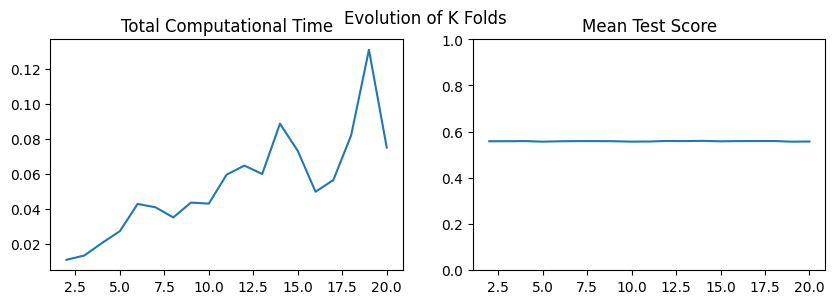

In [13]:
# YOUR CODE HERE
# Start a figure
plt.figure(figsize=(10,3))

# First subplot
plt.subplot(1,2,1)
plt.plot(range(2,21), total_comp_times)
plt.title('Total Computational Time')

# Second subplot
plt.subplot(1,2,2) 
plt.plot(range(2,21), mean_scores)
plt.title("Mean Test Score")
plt.ylim(0,1)

# Global figure methods
plt.suptitle('Evolution of K Folds') 
plt.show()

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [14]:
# YOUR CODE HERE

# instantiate model
model = LinearRegression()

# train model on training data
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [15]:
# YOUR CODE HERE

# In Sklearn, all attributes are suffixed with a trailing underscore 
# -> scikit-learn convention to denote “estimated” or “fitted” attributes
# -> attribute was estimated from the data 
# -> attributes have been set in the learning phase of the algorithm

slope = model.coef_[0]
slope
# the change of Win Rating for a one unit increase in Minutes played

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [16]:
# YOUR CODE HERE
intercept = model.intercept_
intercept
# the expected mean value of Win Rating when Minutes Played=0

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [18]:
X

,mp
0,2409
1,2708
2,2407
3,585
4,2056
...,...
3995,565
3996,1785
3997,378
3998,156


In [19]:
# YOUR CODE HERE
minutes_played = pd.DataFrame(data=[[1000]], columns=["mp"])

prediction = model.predict(minutes_played)
prediction

array([1.056205])

### ☑️ Test your code

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

0.9953244768315846

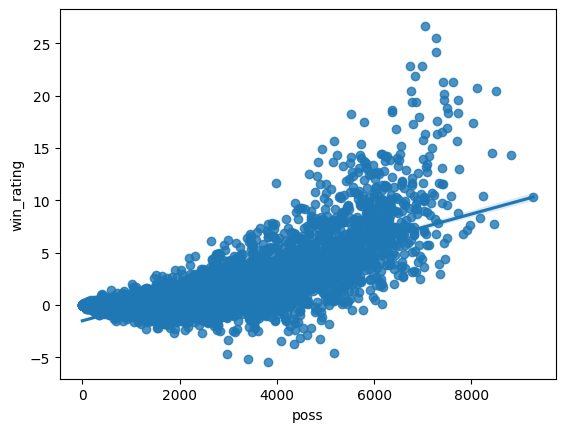

In [27]:
# YOUR CODE HERE
sns.regplot(data=nba_df, x="poss", y="win_rating");
nba_df["poss"].corr(nba_df["mp"])

0.5903536355868297

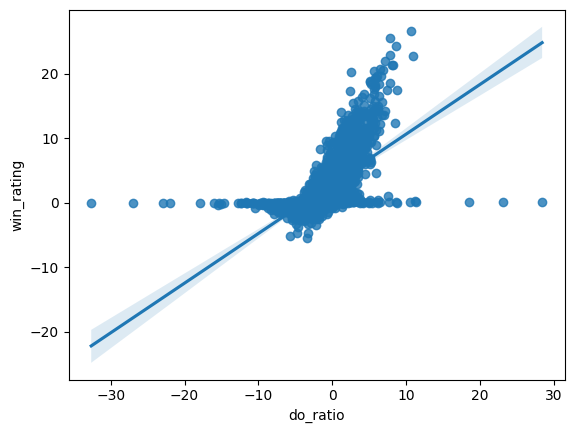

In [28]:
sns.regplot(data=nba_df, x="do_ratio", y="win_rating");
nba_df["do_ratio"].corr(nba_df["mp"])

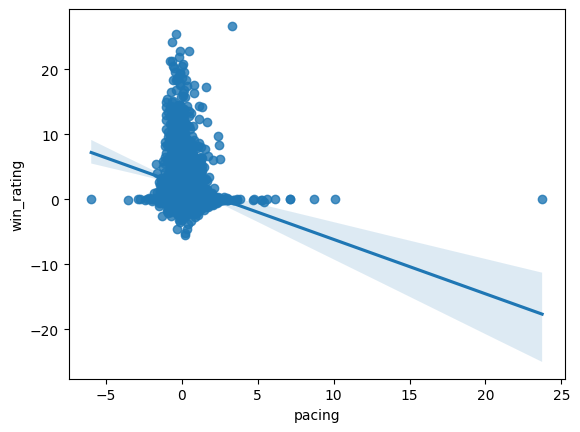

In [23]:
sns.regplot(data=nba_df, x="pacing", y="win_rating");

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [24]:
# YOUR CODE HERE
X = nba_df[["mp", "do_ratio"]]
y = nba_df["win_rating"]

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [25]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, X, y, cv=5)
mean_2_feat_score = np.mean(cv_results)
mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁